# Cálculos de esfuerzos en los componentes de suspensión

_Robert L. Norton, "Diseño de Maquinaria" 3ra ed. Cap. 11, pg. 489-508._

Los cálculos de suspensión son hechos aproximando la geometría tridimensional de los doble A-arms a una proyección de un mecanismo de 4 barras en un plano.

En esta proyección, los elementos que se consideran son:

- La estructura del chasis, simplificado como el elemento 1.
- El A-arm inferior, denominado como elemento 2.
- El conjunto de mangueta, masa y llanta, denominado como elemento 3.
- El A-arm superior, denominado como elemento 3.

Por cada elemento (exepto el elemento 1) se consideran las siguientes cosas:

- Vectores de posición que van desde el centro de masa del elemento hasta los enlaces, denominados con $R$.
- Las fuerzas de reacción en los enlaces, denominados con $F$.
- Fuerzas y torques externos.
- Aceleración lineal en el centro de masa o, en su defecto, la fuerza reaccionaria del elemento y su masa.
- Aceleración angular o fuerza torcional en el elemento. Para esta última se requiere el momento de inercia del elemento.

## Fórmulas

De manera general, los sistemas de _n_ barras se resuelven con sistemas de ecuaciones simultáneas que describen todas las fuerzas que actúan sobre cada uno de los elementos.
La siguiente fórmula es la fórmula general para resolverlos:

$$F_{ij}+F_{jk}+\sum{F_{extj}}=m_ja_{Gj}$$

$$(R_{ij}\times F_{ij})+(R_{jk}\times F_{jk})+\sum{T_{extj}}+\sum{(R_{extj}\times F_{extj})}$$

$$j = 2, 3, ..., n | i=j-1 | k=j+1;j\neq n| si: j=n, k=1$$

Debido a la ley acción-reacción de Newton, las fuerzas en los enlaces $F_{ij}$ cumplen la siguiente igualdad:

$$F_{ij}=-F_{ji}$$

## Planteamiento

El elemento correspondiente a la mangueta es el que recibe la fuerza externa de tracción.
En este elemento, la fuerza de tracción será denominada $F_t$ y la distancia hacia su fuente será $R_t$.
Las fuerzas del push bar serán denominadas $T_b$ y $F_b$.

### Álgebraico

Teniendo en cuenta nuestra geometría de suspensión y asumiendo que la estabilización principal va a ser dada por una push-bar en el miembro inferior, tenemos las siguientes equaciones que nos describen el sistema:

En el elemento 2:

$$F_{12x} + F_{32x} + F_{bx} = m_2a_{2Gx}$$
$$F_{12y} + F_{32y} + F_{by} = m_2a_{2Gy}$$
$$T_b + (R_{12x}F_{12y}-R_{12y}F_{12x}) + (R_{32x}F_{32y}-R_{32y}F_{32x})=I_{G2}\alpha_2$$

En el elemento 3:

$$F_{43x} - F_{32x} + F_{tx} = m_3a_{G3x}$$
$$F_{43y} - F_{32y} + F_{ty} = m_3a_{G3y}$$
$$(R_{43x}F_{43y}-R_{43y}F_{43x}) - (R_{23x}F_{32y}-R_{23y}F_{32x}) + (R_{tx}F_{ty}-R_{ty}F_{tx})=I_{G3}\alpha_3$$

En el elemento 4:

$$F_{14x} - F_{43x} = m_4a_{G4x}$$
$$F_{14y} - F_{43y} = m_4a_{G4y}$$
$$(R_{14x}F_{14y}-R_{14y}F_{14x}) - (R_{34x}F_{43y}-R_{34y}F_{43x}) = I_{G4}\alpha_4$$

### Matricial

Como tenemos un sistema de ecuaciones, podemos plantearlo como una equación matricial del tipo $A\times B=C$ que puede resolverse con métodos como Newton-Raphson y eliminación Gaussiana.

En esta ecuación, el vector $B$ contiene todas las incóginitas del sistema, la matriz $A$ contine los coeficientes de las incógnitas o información geométrica del mecanismo y, finalmente, el vector $C$ se encuentra toda la información pertinente al equilibrio del sistema, como las aceleraciones resultantes.

En nuestro caso, la ecuación matricial luce así:

$$
\begin{bmatrix}
	       1 &        0 &        1 &        0 &        0 &        0 &        0 &        0 &        0 \\
	       0 &        1 &        0 &        1 &        0 &        0 &        0 &        0 &        0 \\
	-R_{12y} &  R_{12x} & -R_{32y} &  R_{32x} &        0 &        0 &        0 &        0 &        1 \\
	       0 &        0 &       -1 &        0 &        1 &        0 &        0 &        0 &        0 \\
	       0 &        0 &        0 &       -1 &        0 &        1 &        0 &        0 &        0 \\
	       0 &        0 &  R_{23y} & -R_{23x} & -R_{43y} &  R_{43x} &        0 &        0 &        0 \\
	       0 &        0 &        0 &        0 &       -1 &        0 &        1 &        0 &        0 \\
	       0 &        0 &        0 &        0 &        0 &       -1 &        0 &        1 &        0 \\
	       0 &        0 &        0 &        0 &  R_{34y} & -R_{34x} & -R_{14y} &  R_{14x} &        0
\end{bmatrix}
\times
\begin{bmatrix}
	F_{12x} \\ F_{12y} \\ F_{32x} \\ F_{32y} \\ F_{43x} \\ F_{43y} \\ F_{14x} \\ F_{14y} \\      T_b
\end{bmatrix}
=
\begin{bmatrix}
	m_2a_{G2x} - F_{bx}                         \\
	m_2a_{G2y} - F_{by}                         \\
	I_{G2}\alpha_2                              \\
	m_3a_{G3x} - F_{tx}                         \\
	m_3a_{G3y} - F_{ty}                         \\
	I_{G3}\alpha_3 - R_{tx}F_{ty} + R_{ty}F_{tx}\\
	m_4a_{G4x}                                  \\
	m_4a_{G4y}                                  \\
	I_{G4}\alpha_4
\end{bmatrix}
$$

In [1]:
import numpy             as np
import numpy.linalg      as lag
import matplotlib.pyplot as plt
import vector            as vec
import fourbars          as fba

from matplotlib import ticker

# numpy.linalg.solve para resolver la ecuación matricial

In [2]:
def to_coordinates(l:np.ndarray, theta:np.ndarray):
	rel_coordinates = vec.to_vect(l, theta)
	abs_coordinates = np.cumsum(rel_coordinates, axis=1)
	return rel_coordinates, abs_coordinates

def get_middle_com(rel_coordinates:np.ndarray):
	com_prev = np.zeros_like(rel_coordinates)
	com_next = np.zeros_like(rel_coordinates)

	com_prev = -rel_coordinates / 2
	com_next =  rel_coordinates / 2

	return com_prev, com_next

def sum_rel_vect_to_abs(
		theta:np.ndarray,
		vec_magnitude:float,
		vec_rel_angle:float,
		base_element:int,
		abs_coordinates:np.ndarray=None
):
	rel_offset = vec.to_vect(vec_magnitude, theta[base_element] + vec_rel_angle)

	if abs_coordinates is None:
		return rel_offset
	
	abs_offset = abs_coordinates[:, base_element-1] + rel_offset

	return rel_offset, abs_offset

def get_geo_mtx(com_r:np.ndarray, torque_element:int=1) -> np.ndarray:
	com_prv = com_r[0]
	com_nxt = com_r[1]
	geo_mtx = np.array([
		[          1.0,          0.0,           1.0,           0.0,           0.0,           0.0,           0.0,           0.0, 0.0],
		[          0.0,          1.0,           0.0,           1.0,           0.0,           0.0,           0.0,           0.0, 0.0],
		[-com_prv[1,1], com_prv[0,1], -com_nxt[1,1],  com_nxt[0,1],           0.0,           0.0,           0.0,           0.0, 0.0],
		[          0.0,          0.0,          -1.0,           0.0,           1.0,           0.0,           0.0,           0.0, 0.0],
		[          0.0,          0.0,           0.0,          -1.0,           0.0,           1.0,           0.0,           0.0, 0.0],
		[          0.0,          0.0,  com_prv[1,2], -com_prv[0,2], -com_nxt[1,2],  com_nxt[0,2],           0.0,           0.0, 0.0],
		[          0.0,          0.0,           0.0,           0.0,          -1.0,           0.0,           1.0,           0.0, 0.0],
		[          0.0,          0.0,           0.0,           0.0,           0.0,          -1.0,           0.0,           1.0, 0.0],
		[          0.0,          0.0,           0.0,           0.0, -com_prv[1,3], -com_prv[0,3], -com_nxt[1,3], com_nxt[0,3], 0.0]
	])

	if torque_element is not None or torque_element != 0:
		geo_mtx[torque_element*3 - 1, -1] = 1.0

	return geo_mtx

## Parámetros

In [3]:
# VALORES USADOS PARA CONSUGUIR LOS ÁNGULOS INICIALES
# DE LOS ELEMENTOS 1 Y 2 DE LA SUSPENSIÓN.
dist_to_B = np.array([-310.04, -  1.69])
dist_to_E = np.array([  18.95, -207.89])

# LONGITUDES DE LOS ELEMENTOS DE SUSPENSIÓN
L1 = 208.75
L2 = 310.05
L3 = 220.00
L4 = 263.67
l  = np.array([L1, L2, L3, L4])

# PARÁMETROS INICIALES DEL VECTOR HACIA LA TRACCIÓN DEL ELEMENTO 3
# rest_traction_offset   = dist_to_C - (rel_coordinates[:, 0] + rel_coordinates[:, 1])
# wheel_offset_magnitude = lag.norm(rest_traction_offset)
# wheel_offset_angle     =  vec.angle_vect(rest_traction_offset) - theta[2]
# dist_to_C              = rel_coordinates[:, 0] + np.array([-399.18, -158.58])
rest_traction_offset   = np.array([ -89.13460606, -156.8899706 ])
# DESDE LA UNIÓN DEL ELEMENTO 2 CON EL 3
wheel_offset_magnitude = 180.44234778055866
wheel_offset_angle     = -3.5326093089517907 #rads

# DATOS DEL CENTRO DE MASA DEL ELEMENTO 3
# DESDE LA UNIÓN DEL ELEMENTO 2 CON EL 3
e3_com_magnitude = 128.17212
e3_com_rel_angle = 0.3902843081 #rads

# DATOS DE LA FUERZA DE TRACCIÓN Y PESO DE LOS ELEMENTOS
traction = np.array([0.0, 441.3])
gravity  = np.array([0.0, -9.81])
masses   = np.array([ # en kg
	0.0,                 # Chasis, no se considera
	1.0,                 # A-arm inferior
	4.220+2.770+1.38709, # Mangueta, frenos y llanta
	1.0                  # A-arm superior
])

In [4]:
theta1 = vec.angle_vect(dist_to_E)
theta2 = vec.angle_vect(dist_to_B)# + np.deg2rad(- 10)

theta = fba.get_abs_theta(l, theta2, theta1)
alpha = fba.get_internal_angles(theta)

print('Prueba de 4 barras:')
print(f'   [ -84.79165554 -179.68768898   82.80120257   -1.8881826 ] Esperado')
print(f'   {np.rad2deg(theta)}')
print('Prueba ángulos internos')
print(f'   [85.10396656 82.48889155 95.31061484 97.09652705] Esperado')
print(f'   {np.rad2deg(alpha)}')

Prueba de 4 barras:
   [ -84.79165554 -179.68768898   82.80120257   -1.8881826 ] Esperado
   [ -84.79165554 -179.68768898   82.80120257   -1.8881826 ]
Prueba ángulos internos
   [85.10396656 82.48889155 95.31061484 97.09652705] Esperado
   [85.10396656 82.48889155 95.31061484 97.09652705]


In [5]:
# wheel_offset    = vec.to_vect(wheel_offset_magnitude, theta[2] + wheel_offset_angle)
# traction_offset = abs_coordinates[:, 1] + wheel_offset

rel_coordinates, abs_coordinates = to_coordinates(l, theta)
wheel_offset,    traction_offset = sum_rel_vect_to_abs(
	theta,
	wheel_offset_magnitude,
	wheel_offset_angle,
	2,
	abs_coordinates=abs_coordinates
)

print(traction_offset)

[-380.23017223 -366.4681106 ]


In [6]:
# e3_com_abs_angle = theta[2] + e3_com_rel_angle
# e3_com_rel_vect  = vec.to_vect(e3_com_magnitude, e3_com_abs_angle)
# e3_com_abs_vect  = abs_coordinates[:, 1] + e3_com_rel_vect

e3_com_rel_vect, e3_com_abs_vect = sum_rel_vect_to_abs(
	theta,
	e3_com_magnitude,
	e3_com_rel_angle,
	2,
	abs_coordinates=abs_coordinates
)

# print('[-324.62069566  -85.8681645 ]')
print(e3_com_abs_vect)
# print('[-380.23017223 -366.4681106 ]')
print(traction_offset)

[-324.62069566  -85.8681645 ]
[-380.23017223 -366.4681106 ]


In [7]:
com_prv, com_nxt = get_middle_com(rel_coordinates)

com_prv[:, 2] = abs_coordinates[:, 1] - e3_com_abs_vect
com_nxt[:, 2] = abs_coordinates[:, 2] - e3_com_abs_vect

e3com_traction = traction_offset - e3_com_abs_vect

# print(rel_coordinates)
print(com_prv)
print(com_nxt)
print()
print(e3com_traction)

[[  -9.47491389  155.02269697   33.5251295  -131.76341795]
 [ 103.9440553     0.8450147  -123.7099755     4.34383649]]
[[   9.47491389 -155.02269697   61.09385976  131.76341795]
 [-103.9440553    -0.8450147    94.55583747   -4.34383649]]

[ -55.60947657 -280.5999461 ]


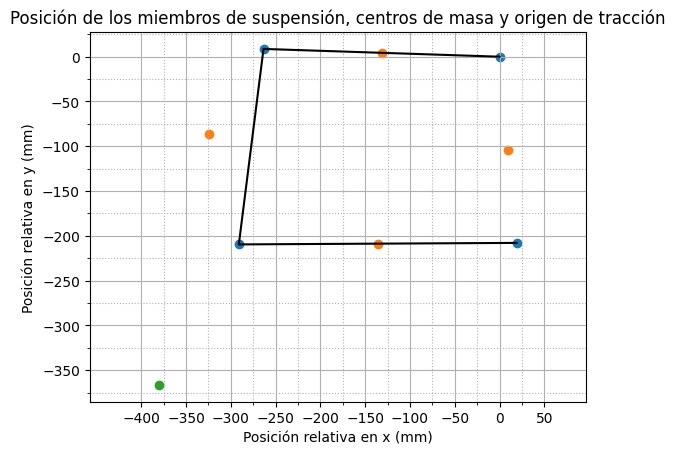

In [8]:
fig = plt.figure()
ax  = fig.add_subplot(1, 1, 1)

plt.title('Posición de los miembros de suspensión, centros de masa y origen de tracción')
plt.ylabel('Posición relativa en y (mm)')
plt.xlabel('Posición relativa en x (mm)')

plt.axis('equal')
plt.grid(True)
plt.plot(abs_coordinates[0], abs_coordinates[1], color='black')
plt.scatter(abs_coordinates[0], abs_coordinates[1])
plt.scatter(abs_coordinates[0]-com_nxt[0], abs_coordinates[1]-com_nxt[1])
plt.scatter(traction_offset[0], traction_offset[1])

maj_pos = ticker.MultipleLocator(50)
min_pos = ticker.MultipleLocator(25)

ax.xaxis.set(major_locator=maj_pos, minor_locator=min_pos)
ax.yaxis.set(major_locator=maj_pos, minor_locator=min_pos)
ax.grid(which='minor', linestyle=':')

plt.show()

In [9]:
geo_mtx = get_geo_mtx([com_prv, com_nxt], torque_element=1)

result_mtx = np.array([
	0.0 - masses[1]*gravity[0],
	0.0 - masses[1]*gravity[1],
	0.0,
	0.0 - masses[2]*gravity[0] - traction[0],
	0.0 - masses[2]*gravity[1] - traction[1],
	0.0 - e3com_traction[0]*traction[1] + e3com_traction[1]*traction[0],
	0.0 - masses[3]*gravity[0],
	0.0 - masses[3]*gravity[1],
	0.0,
])

print(geo_mtx)
print()
print(result_mtx)

[[   1.            0.            1.            0.            0.
     0.            0.            0.            0.        ]
 [   0.            1.            0.            1.            0.
     0.            0.            0.            0.        ]
 [  -0.8450147   155.02269697    0.8450147  -155.02269697    0.
     0.            0.            0.            1.        ]
 [   0.            0.           -1.            0.            1.
     0.            0.            0.            0.        ]
 [   0.            0.            0.           -1.            0.
     1.            0.            0.            0.        ]
 [   0.            0.         -123.7099755   -33.5251295   -94.55583747
    61.09385976    0.            0.            0.        ]
 [   0.            0.            0.            0.           -1.
     0.            1.            0.            0.        ]
 [   0.            0.            0.            0.            0.
    -1.            0.            1.            0.        ]
 [   0. 

## Resultados

In [10]:
unknowns = lag.solve(geo_mtx, result_mtx)
labels = [
	'F_12x',
	'F_12y',
	'F_32x',
	'F_32y',
	'F_43x',
	'F_43y',
	'F_14x',
	'F_14y',
	'T_b',
]

for i, unknown in enumerate(unknowns):
	print(f'{labels[i]:<5}:{unknown:12,.3f}')
print('*El torque está en Nmm, no en Nm')

F_12x:     168.213
F_12y:    -344.406
F_32x:    -168.213
F_32y:     354.216
F_43x:    -168.213
F_43y:      -4.905
F_14x:    -168.213
F_14y:       4.905
T_b  : 108,586.474
*El torque está en Nmm, no en Nm
